In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import os
import soundfile as sf

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [2]:
# Defining the paths to the clean audio and noise audio folders
clean_audio_folder = 'clean_audio'
noise_audio_folder = 'noise_audio'
trimmed_clean_folder = 'trimmed_clean_audio'
trimmed_noise_folder = 'trimmed_noise_audio'
output_folder = 'noised_speech'

In [3]:
noise_speech = glob(os.path.join(output_folder, '*.wav'))

In [26]:
# Playing audio file
ipd.Audio(noise_speech[2])

In [27]:
noisy_speech, noisy_speech_sr = librosa.load(noise_speech[2], sr=None)

Mel Spectogram

In [28]:
Mel_S = librosa.feature.melspectrogram(y=noisy_speech,
                                   sr=noisy_speech_sr,
                                   n_mels=128 * 2,)
S_db_mel = librosa.amplitude_to_db(Mel_S, ref=np.max)

In [7]:
Mel_S.shape

(256, 92)

In [8]:
def plot_spect(y, title):
    # Plot the mel spectogram
    fig, ax = plt.subplots(figsize=(10, 5))
    img = librosa.display.specshow(S_db_mel,
                                x_axis='time',
                                y_axis='log',
                                ax=ax)
    ax.set_title(title, fontsize=20)
    fig.colorbar(img, ax=ax, format=f'%0.2f')
    plt.show()

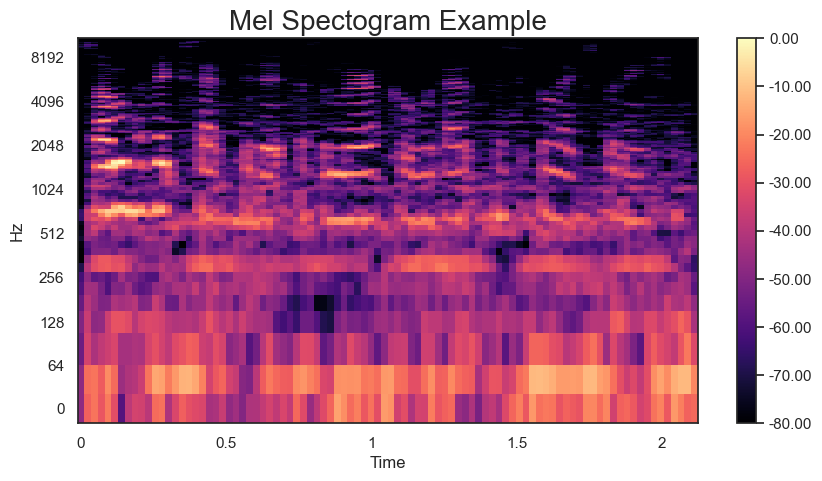

In [9]:
plot_spect(Mel_S, 'Mel Spectogram Example')

In [10]:
Mel_A = librosa.feature.inverse.mel_to_audio(Mel_S)

In [11]:
sf.write('mel_constructed.wav', Mel_A, 16000)

In [12]:
constructed_audio = glob('*.wav')
constructed_audio

['constructed.wav',
 'mel_constructed.wav',
 'normmel_constructed.wav',
 'stft_constructed.wav']

In [13]:
# Playing audio file
ipd.Audio(constructed_audio[1])

STFT spectogram

In [14]:
D = librosa.stft(noisy_speech)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 92)

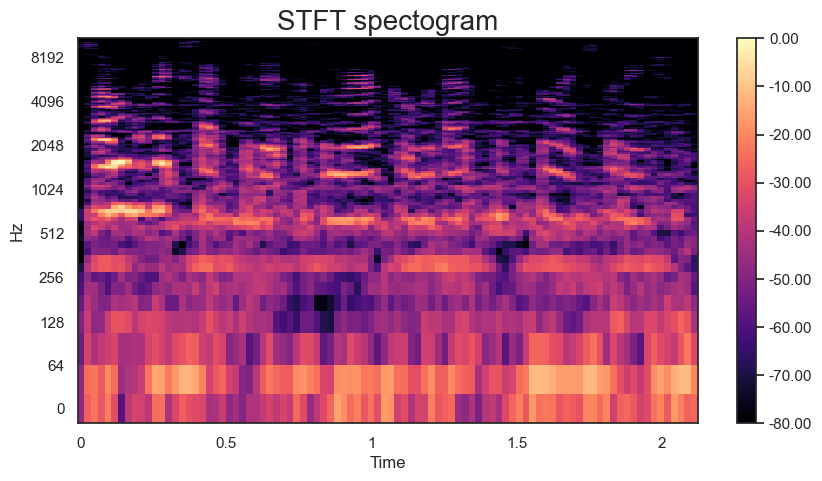

In [15]:
plot_spect(S_db, 'STFT spectogram')

In [16]:
STFT_A = librosa.istft(S_db)

In [17]:
sf.write('stft_constructed.wav', STFT_A, 16000)

In [18]:
constructed_audio = glob('*.wav')
constructed_audio

['constructed.wav',
 'mel_constructed.wav',
 'normmel_constructed.wav',
 'stft_constructed.wav']

In [19]:
# Playing audio file
ipd.Audio(constructed_audio[2])

STFT is not suitable

We will be working with Mel spectogram

# min max normalization

In [41]:
noisy_speech.shape

(64000,)

In [44]:
Mel_S = librosa.feature.melspectrogram(y=noisy_speech,
                                   sr=noisy_speech_sr,
                                   n_mels=128 * 2,)
S_db_mel = librosa.amplitude_to_db(np.abs(Mel_S), ref=np.max)

In [47]:
S_db_mel.max()

-3.8146973e-06

In [48]:
S_db_mel.shape

(256, 126)

In [33]:
norm_S_db_mel = []
for array in Mel_S:
    norm_array = (array-array.min()) / (array.max()- array.min())
    norm_Mel_S.append(norm_array)
norm_Mel_S = np.array(norm_Mel_S)
norm_Mel_S

array([[0.00000000e+00, 8.67555197e-03, 1.18523594e-02, ...,
        7.49962628e-02, 2.28585333e-01, 1.10476822e-01],
       [1.06805591e-02, 1.11690812e-01, 9.05094519e-02, ...,
        3.90732229e-01, 4.58856791e-01, 5.61320446e-02],
       [1.04210965e-01, 2.15628043e-01, 7.17405230e-02, ...,
        1.00000000e+00, 3.53895903e-01, 2.61203106e-02],
       ...,
       [1.89052837e-04, 1.73891662e-04, 1.21387908e-04, ...,
        5.54946746e-05, 6.75173169e-06, 0.00000000e+00],
       [2.71958299e-04, 1.89894999e-04, 1.46047372e-04, ...,
        6.23140513e-05, 1.26519762e-05, 1.22793881e-05],
       [4.74088702e-05, 8.95727644e-05, 1.09530018e-04, ...,
        2.91974102e-05, 1.16570291e-05, 1.29353930e-05]], dtype=float32)

In [34]:
Norm_Mel_A = librosa.feature.inverse.mel_to_audio(norm_Mel_S)
sf.write('norm_mel_constructed2.wav', Mel_A, 16000)
constructed_audio = glob('*.wav')
constructed_audio

['constructed.wav',
 'mel_constructed.wav',
 'normmel_constructed.wav',
 'norm_mel_constructed2.wav',
 'stft_constructed.wav']

In [39]:
# Playing audio file
ipd.Audio(constructed_audio[3])

In [51]:
noise_speech

['noised_speech\\mixed_audio.wav',
 'noised_speech\\mixed_audio1.wav',
 'noised_speech\\mixed_audio2.wav']

In [53]:
# Playing audio file
ipd.Audio(noise_speech[2])

In [82]:
noisy_speech, noisy_speech_sr = librosa.load(noise_speech[2], sr=None)
Mel_S = librosa.feature.melspectrogram(y=noisy_speech,
                                   sr=noisy_speech_sr,
                                   n_mels=128 * 2,)
S_db_mel = librosa.amplitude_to_db(np.abs(Mel_S), ref=np.max)

In [59]:
np.max

<function numpy.amax(a, axis=None, out=None, keepdims=<no value>, initial=<no value>, where=<no value>)>

In [83]:
S_amp_mel = librosa.db_to_amplitude(S_db_mel)
Mel_A = librosa.feature.inverse.mel_to_audio(S_amp_mel)
sf.write('melamp_constructed.wav', Mel_A, 16000)
constructed_audio = glob('*.wav')
constructed_audio

['constructed.wav',
 'melamp_constructed.wav',
 'meldb_constructed.wav',
 'mel_constructed.wav',
 'normmel_constructed.wav',
 'norm_mel_constructed2.wav',
 'stft_constructed.wav']

In [84]:
# Playing audio file
ipd.Audio(constructed_audio[1])

In [78]:
D = librosa.stft(noisy_speech)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

S_amp = librosa.db_to_amplitude(S_db)

STFT_A = librosa.istft(S_amp)
sf.write('stft_constructed.wav', STFT_A, samplerate= noisy_speech_sr)
constructed_audio = glob('*.wav')
# constructed_audio

In [75]:
S_db.shape

(1025, 126)

In [76]:
D.shape

(1025, 126)

In [74]:
S_amp.shape

(1025, 126)

In [81]:
ipd.Audio(constructed_audio[-1])